# DNBCD

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Set the path to your balanced dataset
balanced_dataset_path = '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT'

# Set the image dimensions and other parameters
input_shape = (224, 224, 3)
batch_size = 32
num_classes = 3
epochs = 20

# Create the data generator for training and validation without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator_balanced = train_datagen.flow_from_directory(
    balanced_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator_balanced = train_datagen.flow_from_directory(
    balanced_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Test generator
test_generator = test_datagen.flow_from_directory(
    balanced_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Calculate the class weights to handle data imbalance
class_weights_balanced = dict(zip(range(num_classes), ((len(train_generator_balanced.classes) / (num_classes * np.bincount(train_generator_balanced.classes))).tolist())))

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Create lists to hold the test loss and accuracy
test_loss = []
test_accuracy = []

# Custom callback to record test loss and accuracy after each epoch
class TestCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        loss, acc = model.evaluate(test_generator, verbose=0)
        test_loss.append(loss)
        test_accuracy.append(acc)
        print(f'Test loss: {loss:.4f} - Test accuracy: {acc:.4f}')

# Train the model with the custom callback
history = model.fit(train_generator_balanced, 
                    epochs=epochs, 
                    validation_data=validation_generator_balanced, 
                    class_weight=class_weights_balanced,
                    callbacks=[TestCallback()])

# Final evaluation on the test set
loss, accuracy = model.evaluate(test_generator)
print('Final Test Loss:', loss)
print(f'Final Test Accuracy: {accuracy * 100:.2f}%')

2024-08-21 03:18:39.158468: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-21 03:18:39.158602: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-21 03:18:39.275044: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 1106 images belonging to 3 classes.
Found 472 images belonging to 3 classes.
Found 1578 images belonging to 3 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/35 ━━━━━━━━━━━━━━━━━━━━ 8:08 14s/step - accuracy: 0.3125 - loss: 1.1556

I0000 00:00:1724210345.824389     127 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1724210345.845277     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


16/35 ━━━━━━━━━━━━━━━━━━━━ 13s 727ms/step - accuracy: 0.3914 - loss: 1.5060

W0000 00:00:1724210356.684047     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.4176 - loss: 1.3286

W0000 00:00:1724210363.718367     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724210371.648643     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test loss: 0.8063 - Test accuracy: 0.6768
35/35 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.4196 - loss: 1.3219 - val_accuracy: 0.6504 - val_loss: 0.8379
Epoch 2/20


W0000 00:00:1724210383.577321     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.6003 - loss: 0.7987Test loss: 0.7220 - Test accuracy: 0.6635
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 557ms/step - accuracy: 0.6006 - loss: 0.7957 - val_accuracy: 0.6568 - val_loss: 0.7813
Epoch 3/20
34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.6825 - loss: 0.6138Test loss: 0.6000 - Test accuracy: 0.7351
35/35 ━━━━━━━━━━━━━━━━━━━━ 21s 567ms/step - accuracy: 0.6828 - loss: 0.6142 - val_accuracy: 0.6780 - val_loss: 0.7161
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.7755 - loss: 0.4980Test loss: 0.5461 - Test accuracy: 0.7801
35/35 ━━━━━━━━━━━━━━━━━━━━ 21s 559ms/step - accuracy: 0.7753 - loss: 0.4981 - val_accuracy: 0.7055 - val_loss: 0.7989
Epoch 5/20
34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.8088 - loss: 0.4587Test loss: 0.5671 - Test accuracy: 0.7896
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 552ms/step - accuracy: 0.8091 - loss: 0.4567 - val_accuracy: 0.6589 - val_loss: 1.0457
Epoch 6/20
35/35 ━━━━━━━━━━━━━━

In [2]:
model.save('DNBCD_System.h5')

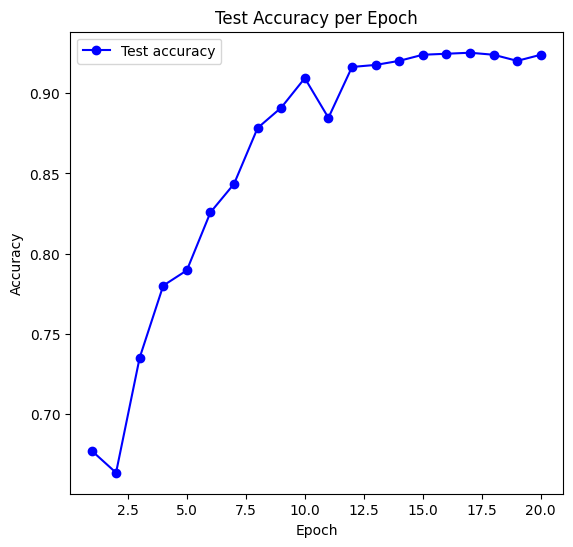

In [3]:
# Plotting the test accuracy and loss curves
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), test_accuracy, 'bo-', label='Test accuracy')
plt.title('Test Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

 1/50 ━━━━━━━━━━━━━━━━━━━━ 31s 643ms/step

W0000 00:00:1724210787.501387     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 196ms/step


W0000 00:00:1724210797.128391     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


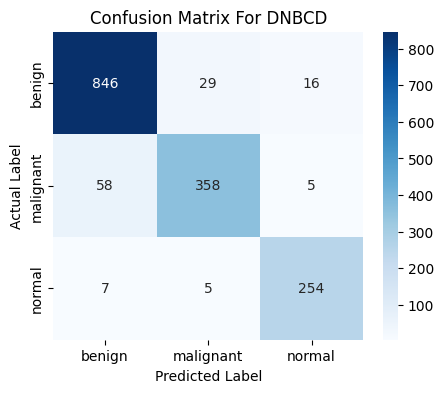

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict the labels for the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)

# Plot the confusion matrix
beingsaved = plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix For DNBCD')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
beingsaved.savefig('Confusion.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# ResNet50

In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt

# Set the path to your balanced dataset
balanced_dataset_path = '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT'

# Set the image dimensions and other parameters
input_shape = (224, 224, 3)
batch_size = 32
num_classes = 3
epochs = 20

# Create the data generator for training and validation without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator_balanced = train_datagen.flow_from_directory(
    balanced_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator_balanced = train_datagen.flow_from_directory(
    balanced_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Test generator
test_generator = test_datagen.flow_from_directory(
    balanced_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Calculate the class weights to handle data imbalance
class_weights_balanced = dict(zip(range(num_classes), ((len(train_generator_balanced.classes) / (num_classes * np.bincount(train_generator_balanced.classes))).tolist())))

# Load the ResNet50 model with pre-trained weights, exclude the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model layers to prevent them from being updated during training
base_model.trainable = False

# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

# Create the final model
resnet_model = Model(inputs=base_model.input, outputs=output)

# Compile the model
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Create lists to hold the test loss and accuracy
test_loss1 = []
test_accuracy1 = []

# Custom callback to record test loss and accuracy after each epoch
class TestCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        loss1, acc1 = resnet_model.evaluate(test_generator, verbose=0)
        test_loss1.append(loss1)
        test_accuracy1.append(acc1)
        print(f'Test loss: {loss1:.4f} - Test accuracy: {acc1:.4f}')

# Train the model with the custom callback
history1 = resnet_model.fit(train_generator_balanced, 
                           epochs=epochs, 
                           validation_data=validation_generator_balanced, 
                           class_weight=class_weights_balanced,
                           callbacks=[TestCallback()])

# Final evaluation on the test set
loss1, accuracy1 = resnet_model.evaluate(test_generator)
print('Final Test Loss:', loss1)
print(f'Final Test Accuracy: {accuracy1 * 100:.2f}%')


Found 1106 images belonging to 3 classes.
Found 472 images belonging to 3 classes.
Found 1578 images belonging to 3 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 2/35 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.3203 - loss: 1.8505  

W0000 00:00:1724210818.334790     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


23/35 ━━━━━━━━━━━━━━━━━━━━ 5s 477ms/step - accuracy: 0.3140 - loss: 1.5888

W0000 00:00:1724210828.690279     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.3409 - loss: 1.4945

W0000 00:00:1724210834.749182     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724210844.289648     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test loss: 1.1127 - Test accuracy: 0.3625
35/35 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.3424 - loss: 1.4877 - val_accuracy: 0.3326 - val_loss: 1.1440
Epoch 2/20


W0000 00:00:1724210859.935982     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.5708 - loss: 0.8660Test loss: 0.8452 - Test accuracy: 0.5627
35/35 ━━━━━━━━━━━━━━━━━━━━ 21s 565ms/step - accuracy: 0.5705 - loss: 0.8658 - val_accuracy: 0.5212 - val_loss: 0.8751
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.6007 - loss: 0.8142Test loss: 1.0246 - Test accuracy: 0.4842
35/35 ━━━━━━━━━━━━━━━━━━━━ 21s 562ms/step - accuracy: 0.6006 - loss: 0.8149 - val_accuracy: 0.4492 - val_loss: 1.0711
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.5740 - loss: 0.8572Test loss: 0.6863 - Test accuracy: 0.6559
35/35 ━━━━━━━━━━━━━━━━━━━━ 22s 587ms/step - accuracy: 0.5745 - loss: 0.8567 - val_accuracy: 0.6441 - val_loss: 0.7239
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.6141 - loss: 0.8142Test loss: 0.6907 - Test accuracy: 0.7104
35/35 ━━━━━━━━━━━━━━━━━━━━ 40s 558ms/step - accuracy: 0.6141 - loss: 0.8132 - val_accuracy: 0.6970 - val_loss: 0.7293
Epoch 6/20
35/35 ━━━━━━━━━━━━━━

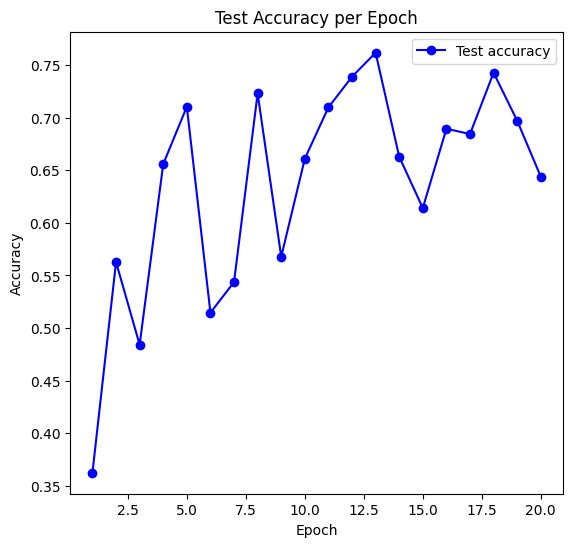

In [6]:
# Plotting the test accuracy and loss curves
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), test_accuracy1, 'bo-', label='Test accuracy')
plt.title('Test Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

 2/50 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step

W0000 00:00:1724211294.222264     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 260ms/step


W0000 00:00:1724211306.981605     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


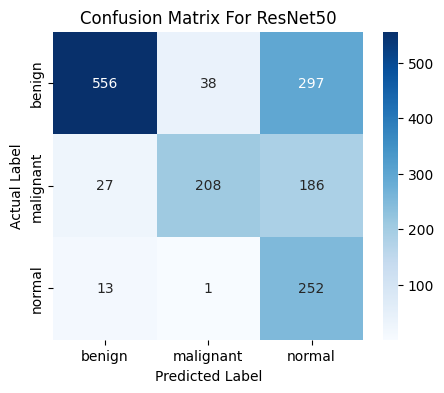

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict the labels for the test set
Y_pred = resnet_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)

# Plot the confusion matrix
beingsaved = plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix For ResNet50')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
beingsaved.savefig('Confusion1.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# MobileNet

In [8]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt

# Set the path to your balanced dataset
balanced_dataset_path = '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT'

# Set the image dimensions and other parameters
input_shape = (224, 224, 3)
batch_size = 32
num_classes = 3
epochs = 20

# Create the data generator for training and validation without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3,    
    rotation_range=20,         # Randomly rotate images in the range (degrees)
    width_shift_range=0.2,     # Randomly translate images horizontally (fraction of total width)
    height_shift_range=0.2,    # Randomly translate images vertically (fraction of total height)
    shear_range=0.15,          # Shear Intensity (Shear angle in counter-clockwise direction in degrees)
    zoom_range=0.15,           # Randomly zoom image
    horizontal_flip=True,      # Randomly flip images horizontally
    fill_mode='nearest' )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator_balanced = train_datagen.flow_from_directory(
    balanced_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator_balanced = train_datagen.flow_from_directory(
    balanced_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Test generator
test_generator = test_datagen.flow_from_directory(
    balanced_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Calculate the class weights to handle data imbalance
class_weights_balanced = dict(zip(range(num_classes), ((len(train_generator_balanced.classes) / (num_classes * np.bincount(train_generator_balanced.classes))).tolist())))

# Load the MobileNet model with pre-trained weights, exclude the top layers
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model layers to prevent them from being updated during training
base_model.trainable = False

# Add custom layers on top of MobileNet
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

# Create the final model
mobilenet_model = Model(inputs=base_model.input, outputs=output)

# Compile the model
mobilenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Create lists to hold the test loss and accuracy
test_loss2 = []
test_accuracy2 = []

# Custom callback to record test loss and accuracy after each epoch
class TestCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        loss2, acc2 = mobilenet_model.evaluate(test_generator, verbose=0)
        test_loss2.append(loss2)
        test_accuracy2.append(acc2)
        print(f'Test loss: {loss2:.4f} - Test accuracy: {acc2:.4f}')

# Train the model with the custom callback
history2 = mobilenet_model.fit(train_generator_balanced, 
                           epochs=epochs, 
                           validation_data=validation_generator_balanced, 
                           class_weight=class_weights_balanced,
                           callbacks=[TestCallback()])

# Final evaluation on the test set
loss2, accuracy2 = mobilenet_model.evaluate(test_generator)
print('Final Test Loss:', loss2)
print(f'Final Test Accuracy: {accuracy2 * 100:.2f}%')


Found 1106 images belonging to 3 classes.
Found 472 images belonging to 3 classes.
Found 1578 images belonging to 3 classes.
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/35 ━━━━━━━━━━━━━━━━━━━━ 7:11 13s/step - accuracy: 0.3750 - loss: 1.1050

W0000 00:00:1724211322.549989     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


20/35 ━━━━━━━━━━━━━━━━━━━━ 10s 690ms/step - accuracy: 0.6260 - loss: 1.0647

W0000 00:00:1724211335.620959     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 539ms/step - accuracy: 0.6726 - loss: 0.9138

W0000 00:00:1724211344.064044     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724211355.466601     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test loss: 0.3198 - Test accuracy: 0.8688
35/35 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.6774 - loss: 0.8978 - val_accuracy: 0.8136 - val_loss: 0.4492
Epoch 2/20


W0000 00:00:1724211368.543093     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 0.8158 - loss: 0.3953Test loss: 0.3088 - Test accuracy: 0.8631
35/35 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8164 - loss: 0.3945 - val_accuracy: 0.8072 - val_loss: 0.4798
Epoch 3/20
34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - accuracy: 0.8768 - loss: 0.2840Test loss: 0.2884 - Test accuracy: 0.8866
35/35 ━━━━━━━━━━━━━━━━━━━━ 39s 997ms/step - accuracy: 0.8771 - loss: 0.2840 - val_accuracy: 0.8051 - val_loss: 0.5842
Epoch 4/20
34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.8403 - loss: 0.3077Test loss: 0.2786 - Test accuracy: 0.8973
35/35 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8408 - loss: 0.3080 - val_accuracy: 0.8178 - val_loss: 0.4834
Epoch 5/20
34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - accuracy: 0.8660 - loss: 0.2922Test loss: 0.2789 - Test accuracy: 0.8929
35/35 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8660 - loss: 0.2924 - val_accuracy: 0.8072 - val_loss: 0.5573
Epoch 6/20
34/35 ━━━━━━━━━━━━━━━━━━━━ 0s

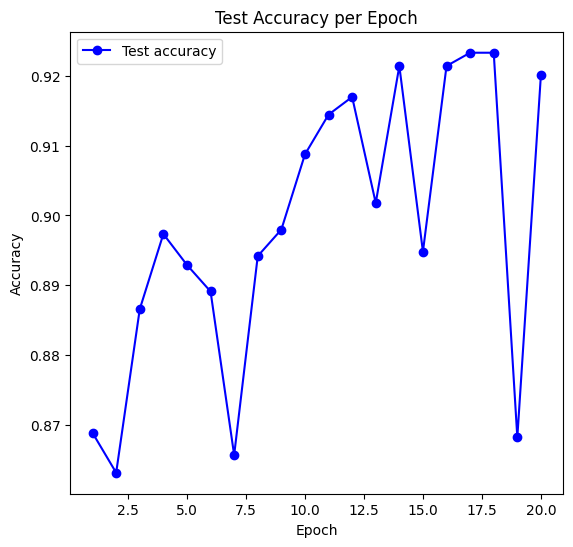

In [9]:
# Plotting the test accuracy and loss curves
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), test_accuracy2, 'bo-', label='Test accuracy')
plt.title('Test Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

 1/50 ━━━━━━━━━━━━━━━━━━━━ 1:40 2s/step

W0000 00:00:1724212115.287067     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 222ms/step


W0000 00:00:1724212126.177073     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


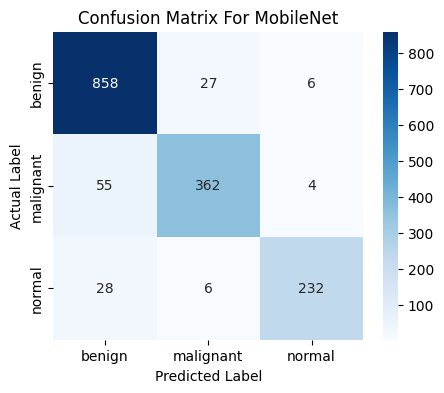

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict the labels for the test set
Y_pred = mobilenet_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)

# Plot the confusion matrix
beingsaved = plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix For MobileNet')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
beingsaved.savefig('Confusion2.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# VGG16

In [11]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt

# Set the path to your balanced dataset
balanced_dataset_path = '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT'

# Set the image dimensions and other parameters
input_shape = (224, 224, 3)
batch_size = 32
num_classes = 3
epochs = 20

# Create the data generator for training and validation without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3,    
    rotation_range=20,         # Randomly rotate images in the range (degrees)
    width_shift_range=0.2,     # Randomly translate images horizontally (fraction of total width)
    height_shift_range=0.2,    # Randomly translate images vertically (fraction of total height)
    shear_range=0.15,          # Shear Intensity (Shear angle in counter-clockwise direction in degrees)
    zoom_range=0.15,           # Randomly zoom image
    horizontal_flip=True,      # Randomly flip images horizontally
    fill_mode='nearest' )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator_balanced = train_datagen.flow_from_directory(
    balanced_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator_balanced = train_datagen.flow_from_directory(
    balanced_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Test generator
test_generator = test_datagen.flow_from_directory(
    balanced_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Calculate the class weights to handle data imbalance
class_weights_balanced = dict(zip(range(num_classes), ((len(train_generator_balanced.classes) / (num_classes * np.bincount(train_generator_balanced.classes))).tolist())))

# Load the VGG16 model with pre-trained weights, exclude the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model layers to prevent them from being updated during training
base_model.trainable = False

# Add custom layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

# Create the final model
vgg16_model = Model(inputs=base_model.input, outputs=output)

# Compile the model
vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Create lists to hold the test loss and accuracy
test_loss3 = []
test_accuracy3 = []

# Custom callback to record test loss and accuracy after each epoch
class TestCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        loss3, acc3 = vgg16_model.evaluate(test_generator, verbose=0)
        test_loss3.append(loss3)
        test_accuracy3.append(acc3)
        print(f'Test loss: {loss3:.4f} - Test accuracy: {acc3:.4f}')

# Train the model with the custom callback
history3 = vgg16_model.fit(train_generator_balanced, 
                           epochs=epochs, 
                           validation_data=validation_generator_balanced, 
                           class_weight=class_weights_balanced,
                           callbacks=[TestCallback()])

# Final evaluation on the test set
loss3, accuracy3 = vgg16_model.evaluate(test_generator)
print('Final Test Loss:', loss3)
print(f'Final Test Accuracy: {accuracy3 * 100:.2f}%')


Found 1106 images belonging to 3 classes.
Found 472 images belonging to 3 classes.
Found 1578 images belonging to 3 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5157 - loss: 1.0109Test loss: 0.7720 - Test accuracy: 0.6888
35/35 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.5171 - loss: 1.0085 - val_accuracy: 0.5890 - val_loss: 0.8606
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - accuracy: 0.7184 - loss: 0.7188Test loss: 0.6749 - Test accuracy: 0.6825
35/35 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.7188 - loss: 0.7178 - val_accuracy: 0.6441 - val_loss: 0.7463
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - accuracy: 0.7101 - loss: 0.6132Test loss: 0.5363 - Test accuracy: 0.7757
35/35 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.7108 - loss: 0.6124 - val_accuracy: 0.7034 - val_loss: 0.6417
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 0.7748 - loss: 0.5372Test loss: 0.4564 - Test accuracy: 0.8321
35/35 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.7746 - loss: 0.5368 - val_accuracy: 0.7500 - val_loss: 0.5560
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 465m

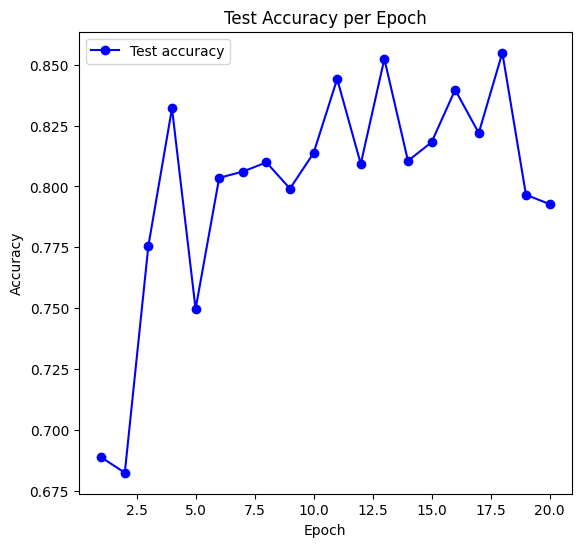

In [12]:
# Plotting the test accuracy and loss curves
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), test_accuracy3, 'bo-', label='Test accuracy')
plt.title('Test Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 198ms/step


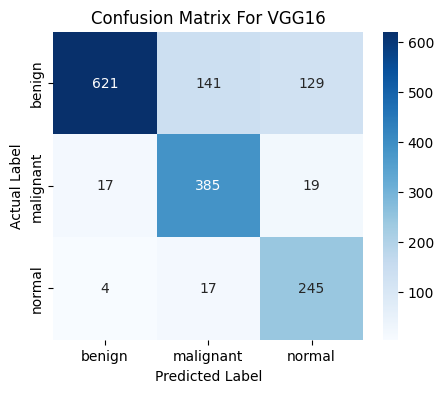

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict the labels for the test set
Y_pred = vgg16_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)

# Plot the confusion matrix
beingsaved = plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix For VGG16')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
beingsaved.savefig('Confusion3.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# DenseNet

In [14]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt

# Set the path to your balanced dataset
balanced_dataset_path = '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT'

# Set the image dimensions and other parameters
input_shape = (224, 224, 3)
batch_size = 32
num_classes = 3
epochs = 20

# Create the data generator for training and validation without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3,    
    rotation_range=20,         # Randomly rotate images in the range (degrees)
    width_shift_range=0.2,     # Randomly translate images horizontally (fraction of total width)
    height_shift_range=0.2,    # Randomly translate images vertically (fraction of total height)
    shear_range=0.15,          # Shear Intensity (Shear angle in counter-clockwise direction in degrees)
    zoom_range=0.15,           # Randomly zoom image
    horizontal_flip=True,      # Randomly flip images horizontally
    fill_mode='nearest' )
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator_balanced = train_datagen.flow_from_directory(
    balanced_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator_balanced = train_datagen.flow_from_directory(
    balanced_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Test generator
test_generator = test_datagen.flow_from_directory(
    balanced_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Calculate the class weights to handle data imbalance
class_weights_balanced = dict(zip(range(num_classes), ((len(train_generator_balanced.classes) / (num_classes * np.bincount(train_generator_balanced.classes))).tolist())))

# Load the DenseNet121 model with pre-trained weights, exclude the top layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model layers to prevent them from being updated during training
base_model.trainable = False

# Add custom layers on top of DenseNet121
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

# Create the final model
densenet_model = Model(inputs=base_model.input, outputs=output)

# Compile the model
densenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Create lists to hold the test loss and accuracy
test_loss4 = []
test_accuracy4 = []

# Custom callback to record test loss and accuracy after each epoch
class TestCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        loss4, acc4 = densenet_model.evaluate(test_generator, verbose=0)
        test_loss4.append(loss4)
        test_accuracy4.append(acc4)
        print(f'Test loss: {loss4:.4f} - Test accuracy: {acc4:.4f}')

# Train the model with the custom callback
history4 = densenet_model.fit(train_generator_balanced, 
                           epochs=epochs, 
                           validation_data=validation_generator_balanced, 
                           class_weight=class_weights_balanced,
                           callbacks=[TestCallback()])

# Final evaluation on the test set
loss4, accuracy4 = densenet_model.evaluate(test_generator)
print('Final Test Loss:', loss4)
print(f'Final Test Accuracy: {accuracy4 * 100:.2f}%')


Found 1106 images belonging to 3 classes.
Found 472 images belonging to 3 classes.
Found 1578 images belonging to 3 classes.
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 2/35 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.3203 - loss: 1.2789 

W0000 00:00:1724213073.311204     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 4/35 ━━━━━━━━━━━━━━━━━━━━ 3:04 6s/step - accuracy: 0.3718 - loss: 1.2976

W0000 00:00:1724213091.115093     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 921ms/step - accuracy: 0.5904 - loss: 0.8903

W0000 00:00:1724213115.879519     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724213140.227547     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test loss: 0.4693 - Test accuracy: 0.8067
35/35 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step - accuracy: 0.5932 - loss: 0.8851 - val_accuracy: 0.7606 - val_loss: 0.5163
Epoch 2/20


W0000 00:00:1724213163.972319     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - accuracy: 0.8138 - loss: 0.4410Test loss: 0.4014 - Test accuracy: 0.8251
35/35 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8143 - loss: 0.4397 - val_accuracy: 0.7648 - val_loss: 0.5704
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.8504 - loss: 0.3531Test loss: 0.3718 - Test accuracy: 0.8504
35/35 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8502 - loss: 0.3537 - val_accuracy: 0.7818 - val_loss: 0.6000
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.8138 - loss: 0.3926Test loss: 0.3630 - Test accuracy: 0.8435
35/35 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8141 - loss: 0.3921 - val_accuracy: 0.7458 - val_loss: 0.5870
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.8590 - loss: 0.3062Test loss: 0.3777 - Test accuracy: 0.8619
35/35 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8588 - loss: 0.3070 - val_accuracy: 0.7945 - val_loss: 0.4770
Epoch 6/20
34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 46

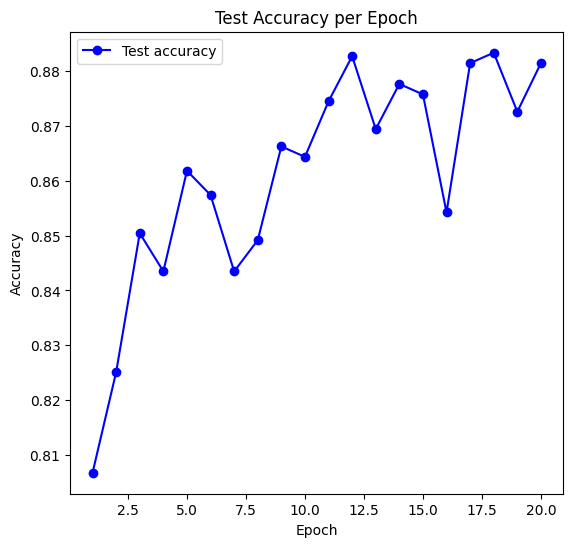

In [15]:
# Plotting the test accuracy and loss curves
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), test_accuracy4, 'bo-', label='Test accuracy')
plt.title('Test Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


 2/50 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step 

W0000 00:00:1724213927.430769     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 371ms/step


W0000 00:00:1724213945.609237     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


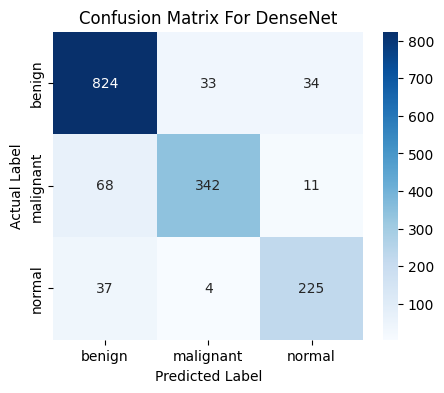

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict the labels for the test set
Y_pred = densenet_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)

# Plot the confusion matrix
beingsaved = plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix For DenseNet')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
beingsaved.savefig('Confusion4.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

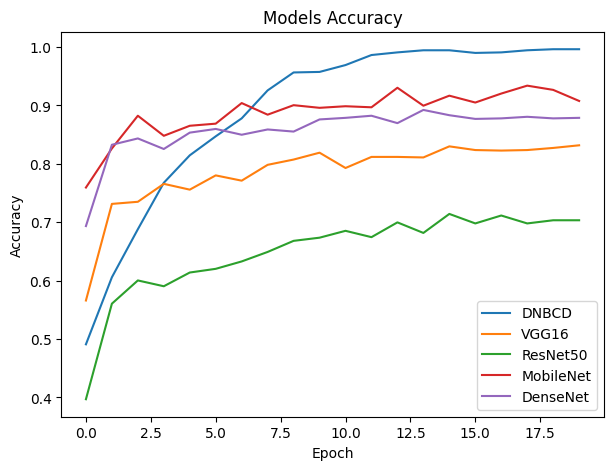

In [17]:
import matplotlib.pyplot as plt

# Accuracy values
acc_dnbcd = history.history['accuracy']
acc_resnet50 = history1.history['accuracy']
acc_mobilenet = history2.history['accuracy']
acc_vgg16 = history3.history['accuracy']
acc_densenet = history4.history['accuracy']

beingsaved = plt.figure(figsize=(7, 5))

plt.plot(acc_dnbcd, label='DNBCD')
plt.plot(acc_vgg16, label='VGG16')
plt.plot(acc_resnet50, label='ResNet50')
plt.plot(acc_mobilenet, label='MobileNet')
plt.plot(acc_densenet, label='DenseNet')


plt.title('Models Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
beingsaved.savefig('Accuracy.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

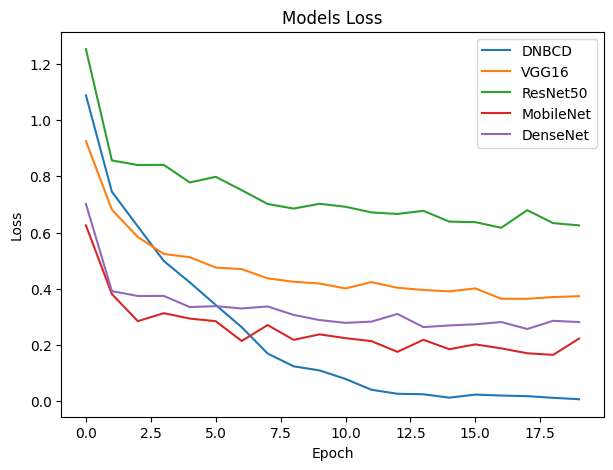

In [18]:
import matplotlib.pyplot as plt

# Accuracy values
acc_dnbcd = history.history['loss']
acc_resnet50 = history1.history['loss']
acc_mobilenet = history2.history['loss']
acc_vgg16 = history3.history['loss']
acc_densenet = history4.history['loss']

beingsaved = plt.figure(figsize=(7, 5))

plt.plot(acc_dnbcd, label='DNBCD')
plt.plot(acc_vgg16, label='VGG16')
plt.plot(acc_resnet50, label='ResNet50')
plt.plot(acc_mobilenet, label='MobileNet')
plt.plot(acc_densenet, label='DenseNet')


plt.title('Models Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
beingsaved.savefig('Loss.png', format='png', dpi=600, bbox_inches="tight")
plt.show()